# The Complete Machine Learning

## Árboles

### Árboles de Decisión (Decision Trees)

* **Qué son:** Son uno of the modelos de Machine Learning más intuitivos. Funcionan creando un diagrama de flujo de "preguntas" (if/then/else) para llegar a una decisión.
* **Por qué son populares:** Son un modelo de **"Caja Blanca" (White Box)**. A diferencia de SVM o Redes Neuronales ("Cajas Negras"), podemos ver *exactamente* cómo el árbol toma una decisión, lo que los hace muy fáciles de interpretar y explicar.
* **¡Importante!** Los árboles de decisión **no requieren escalado de variables** (como `StandardScaler`). Las preguntas (ej. `¿largo_pétalo_cm < 2.4?`) son inmunes a la escala.


### ¿Cómo "aprende" un árbol? (Criterios de División)

El árbol "aprende" buscando la "mejor" pregunta en cada paso. La "mejor" pregunta es aquella que divide los datos en subgrupos que son lo más **"puros"** posible (que contienen una sola clase).

El algoritmo mide la impureza usando una de estas dos métricas:
1.  **Impureza Gini (Gini Impurity):** (`criterion='gini'`) Mide la probabilidad de clasificar incorrectamente una muestra. Es la opción por defecto, ligeramente más rápida.
2.  **Entropía (Entropy):** (`criterion='entropy'`) Mide el "desorden" o la "incertidumbre" en un nodo.


--- Ejecutando Árbol de Clasificación ---
Accuracy del Árbol de Decisión (max_depth=3): 0.8889


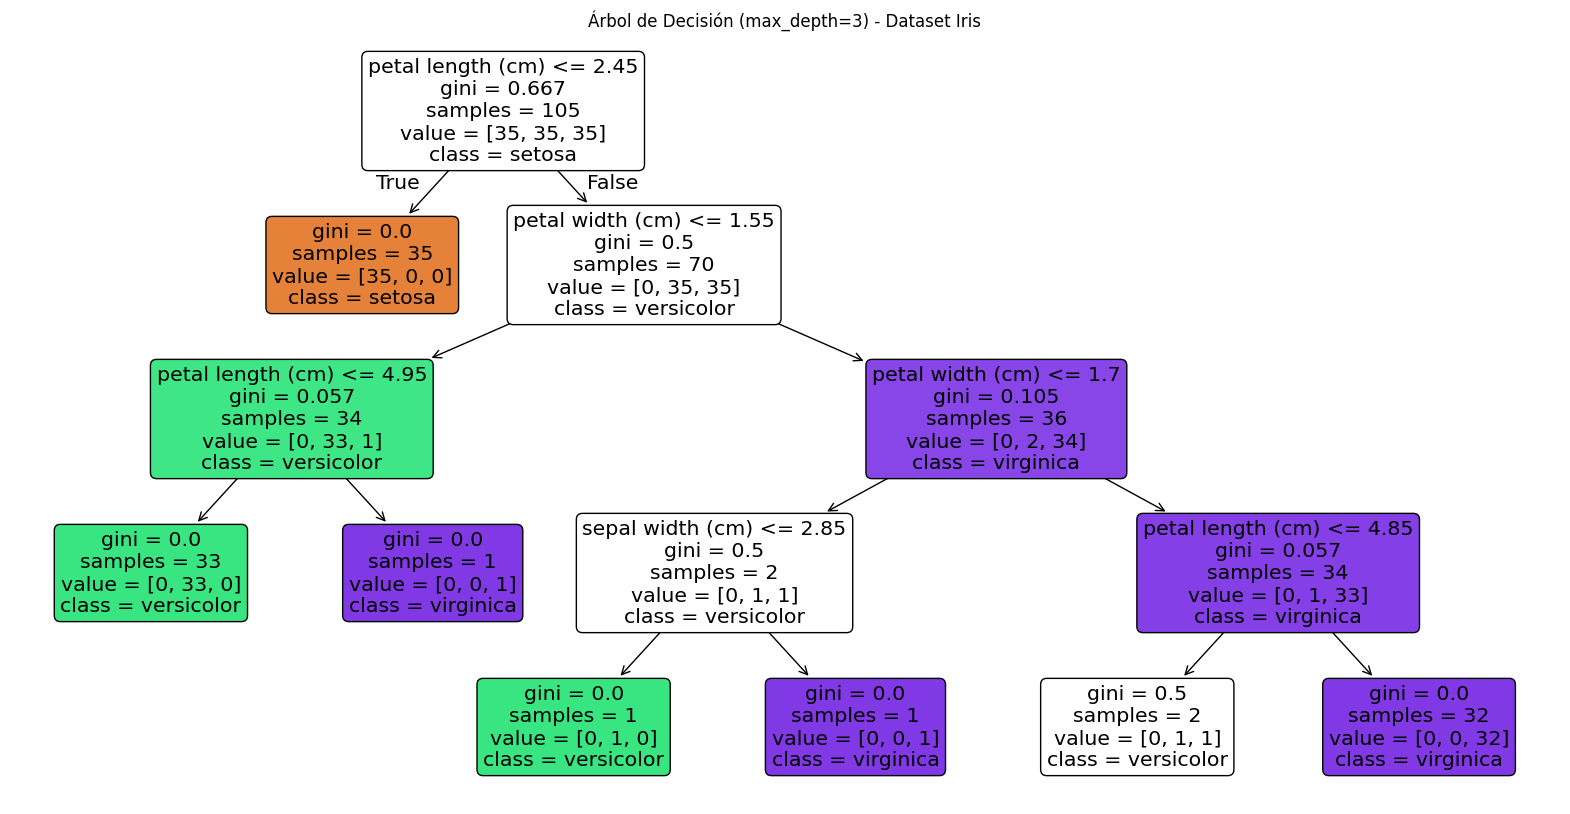

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

print("\n--- Ejecutando Árbol de Clasificación ---")

# 1. Cargar el dataset Iris (con las 4 features)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Dividir datos (NO necesitamos escalar)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Entrenar un Árbol de Clasificación (con regularización)
# 'max_depth=3' -> ¡Hiperparámetro clave! Limita la profundidad para evitar overfitting.
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_tree.fit(X_train, y_train)

# 4. Evaluar
y_pred = clf_tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del Árbol de Decisión (max_depth=3): {acc:.4f}")

# 5. Visualizar el árbol con plot_tree
plt.figure(figsize=(20, 10)) # Hacer la figura más grande
plot_tree(
    clf_tree, 
    filled=True, # Colorear los nodos
    rounded=True, # Bordes redondeados
    class_names=iris.target_names, # Nombres de las clases
    feature_names=iris.feature_names # Nombres de las features
)
plt.title("Árbol de Decisión (max_depth=3) - Dataset Iris")
plt.show()

# Interpretación del Gráfico:
# Nodo Raíz (Arriba): La primera pregunta es "petal length (cm) <= 2.45".
#   gini = 0.666 → Impureza inicial del dataset.
#   samples = 105 → Total de muestras de entrenamiento.
#   value = [35, 35, 35] → 35 muestras de cada clase (Setosa, Versicolor, Virginica).
#
# Hoja Pura (Izquierda): Si "petal length <= 2.45" → True.
#   gini = 0.0 → Nodo completamente puro.
#   samples = 35
#   value = [35, 0, 0]
#   Decisión: Setosa
#
# Nodo Impuro (Derecha): Si "petal length > 2.45" → False.
#   gini = 0.5 → Nodo aún impuro.
#   samples = 70
#   value = [0, 35, 35]
#   El árbol necesita más preguntas para separar Versicolor y Virginica.



### El Problema: Sobreajuste (Overfitting)

Si no le ponemos límites (como `max_depth=None`), un árbol de decisión crecerá hasta que cada hoja sea 100% pura. Esto significa que **se aprenderá de memoria los datos de entrenamiento**, incluyendo el ruido, y fallará en datos nuevos.

### Búsqueda en Rejilla (Grid Search) para Árboles

* **Qué es:** Es una técnica de **búsqueda exhaustiva** (o "fuerza bruta") para la optimización de hiperparámetros. En lugar de adivinar manualmente los mejores valores (como `max_depth`), `GridSearchCV` prueba sistemáticamente un conjunto de valores que le definimos.

* **Cómo funciona:**
    1.  **Defines una "rejilla" (grid):** Creas un diccionario con los hiperparámetros que quieres probar y una lista de valores para cada uno (ej. `{'max_depth': [2, 3, 4, 5], 'criterion': ['gini', 'entropy']}`).
    2.  **Búsqueda Exhaustiva:** `GridSearchCV` entrena un modelo para *cada combinación posible* de estos valores (ej. 4 profundidades * 2 criterios = 8 combinaciones).
    3.  **Validación Cruzada (CV):** Para evaluar cada una de esas 8 combinaciones, utiliza Validación Cruzada (ej. 5-folds). Esto significa que (8 combos * 5 folds) = 40 modelos son entrenados en total.
    4.  **Selección:** Finalmente, reporta la combinación de hiperparámetros que dio el mejor *score* (puntuación) promedio durante la validación cruzada.

* **Propósito:** Encontrar el modelo que mejor **generaliza** (evita el overfitting) de forma automática.

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Mejor accuracy (promedio de CV): 0.9524


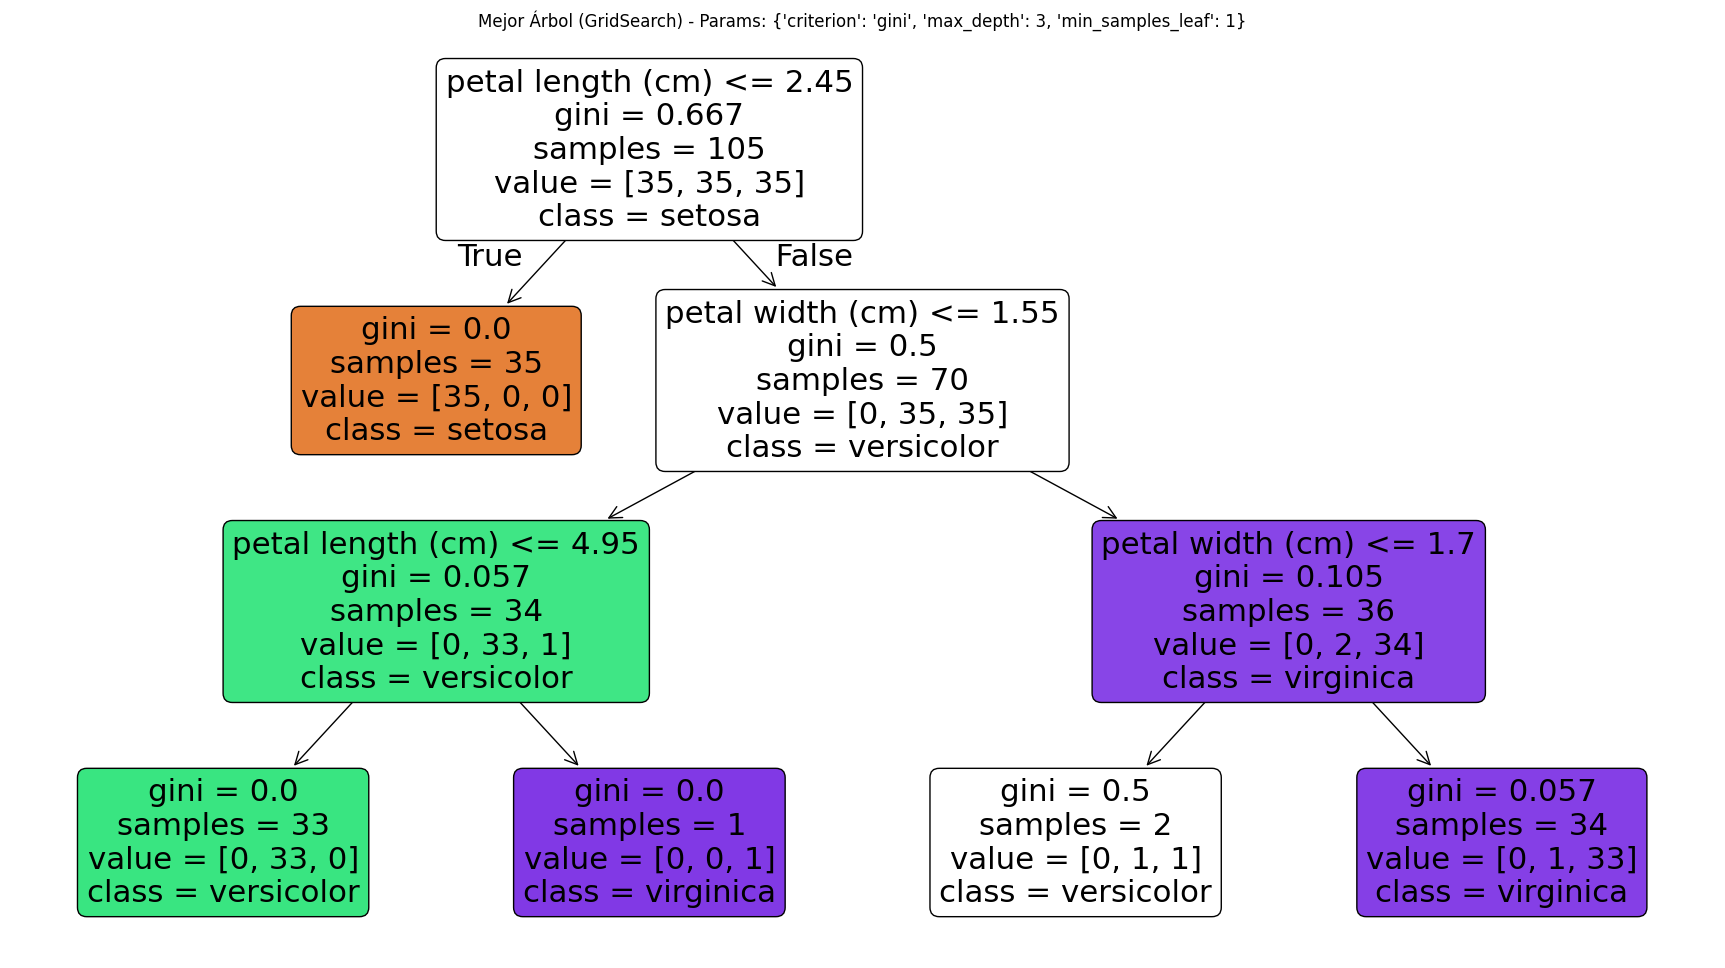

In [2]:
# 1. Definir la rejilla de parámetros a probar
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None], # Probar varias profundidades (None = sin límite)
    'min_samples_leaf': [1, 2, 3, 4]  # Mínimo de muestras en una hoja
}

# 2. Configurar la búsqueda
# 'cv=5' -> 5-fold cross-validation
grid_search_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42), # El modelo base
    param_grid_tree,                          # La rejilla de parámetros
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    verbose=1
)

# 3. Ejecutar la búsqueda (¡En Iris es rápido!)
grid_search_tree.fit(X_train, y_train)

# 4. Ver los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search_tree.best_params_}")
print(f"Mejor accuracy (promedio de CV): {grid_search_tree.best_score_:.4f}")

# 5. Visualizar el MEJOR árbol encontrado
mejor_arbol = grid_search_tree.best_estimator_

plt.figure(figsize=(22, 12))
plot_tree(
    mejor_arbol, 
    filled=True, 
    rounded=True,
    class_names=iris.target_names,
    feature_names=iris.feature_names
)
plt.title(f"Mejor Árbol (GridSearch) - Params: {grid_search_tree.best_params_}")
plt.show()


# GridSearch nos da la combinación de hiperparámetros que 
# produce el mejor accuracy promedio en la validación cruzada. 
# Este "mejor árbol" está regularizado y generalizará mejor a datos nuevos.